In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## **Load Data**

In [4]:
data = pd.read_csv("creditcard_2023.csv")
data = shuffle(data, random_state=42)
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
437378,437378,0.420468,-0.070194,-0.569266,0.191673,-0.009607,0.426903,-0.356728,0.096143,0.077806,...,0.134969,0.070433,0.047770,-0.851622,0.102876,-0.375436,0.820807,0.665983,8633.18,1
504222,504222,-0.238944,0.250929,-0.374408,0.152938,-0.105008,-0.039028,-0.293004,0.133771,-0.591631,...,0.192405,0.289441,-0.255187,-0.817462,0.308284,1.582688,0.574425,0.478489,12299.55,1
4794,4794,-0.117796,-0.147961,2.130455,-0.325762,0.325616,0.271351,0.772625,-0.244342,1.240012,...,-0.271739,-0.404654,-0.121235,0.857659,0.541920,0.756534,-0.238177,-0.403038,5215.87,0
388411,388411,-0.855315,0.137014,-0.628116,0.613733,-0.643573,-0.664283,-0.880040,0.466586,-1.045508,...,0.405505,0.167560,0.446262,-0.205976,0.492582,0.658619,1.609128,-0.025592,19282.98,1
424512,424512,0.257686,0.035247,-0.203112,0.506745,-0.242235,-0.192608,-0.289297,0.044488,-0.396122,...,0.162191,0.165912,-0.181999,0.331451,1.043095,0.029799,0.643273,0.736723,19114.27,1


## **Drop Column ID**

In [5]:
data = data.drop('id', axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
437378,0.420468,-0.070194,-0.569266,0.191673,-0.009607,0.426903,-0.356728,0.096143,0.077806,-0.673283,...,0.134969,0.070433,0.047770,-0.851622,0.102876,-0.375436,0.820807,0.665983,8633.18,1
504222,-0.238944,0.250929,-0.374408,0.152938,-0.105008,-0.039028,-0.293004,0.133771,-0.591631,-0.651518,...,0.192405,0.289441,-0.255187,-0.817462,0.308284,1.582688,0.574425,0.478489,12299.55,1
4794,-0.117796,-0.147961,2.130455,-0.325762,0.325616,0.271351,0.772625,-0.244342,1.240012,0.414358,...,-0.271739,-0.404654,-0.121235,0.857659,0.541920,0.756534,-0.238177,-0.403038,5215.87,0
388411,-0.855315,0.137014,-0.628116,0.613733,-0.643573,-0.664283,-0.880040,0.466586,-1.045508,-1.234377,...,0.405505,0.167560,0.446262,-0.205976,0.492582,0.658619,1.609128,-0.025592,19282.98,1
424512,0.257686,0.035247,-0.203112,0.506745,-0.242235,-0.192608,-0.289297,0.044488,-0.396122,-0.370119,...,0.162191,0.165912,-0.181999,0.331451,1.043095,0.029799,0.643273,0.736723,19114.27,1


In [6]:
null_values = data.isnull().sum()
null_values

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## **Statistics for Numerical Columns**

In [7]:
summary_stats = data.describe()
summary_stats

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-2.836523e-17,-5.518099e-17,7.847297e-17,-2.839022e-17,4.998278e-19,1.736902e-17,2.054292e-17,1.399518e-17,2.991470e-17,1.513229e-16,...,1.088375e-17,-2.124268e-19,7.210016e-18,-1.339539e-17,-3.321356e-17,-3.248881e-19,-1.971821e-17,3.202647e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568630 entries, 437378 to 121958
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [9]:
data['Class'].unique()

array([1, 0], dtype=int64)

In [10]:
counts = data['Class'].value_counts()
counts

Class
1    284315
0    284315
Name: count, dtype: int64

## **Plot Class Distribution**

<Axes: xlabel='Class', ylabel='count'>

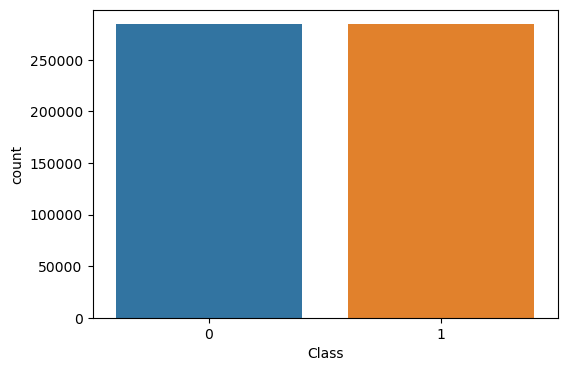

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['Class'])

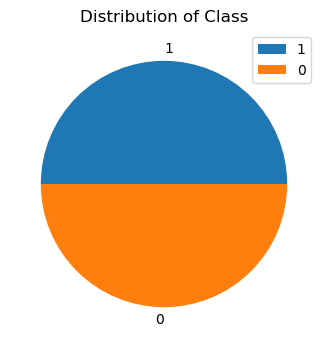

In [12]:
plt.figure(figsize=(6,4))
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index)
plt.title('Distribution of Class')
plt.legend()
plt.show()

## **Correlation Heatmap**

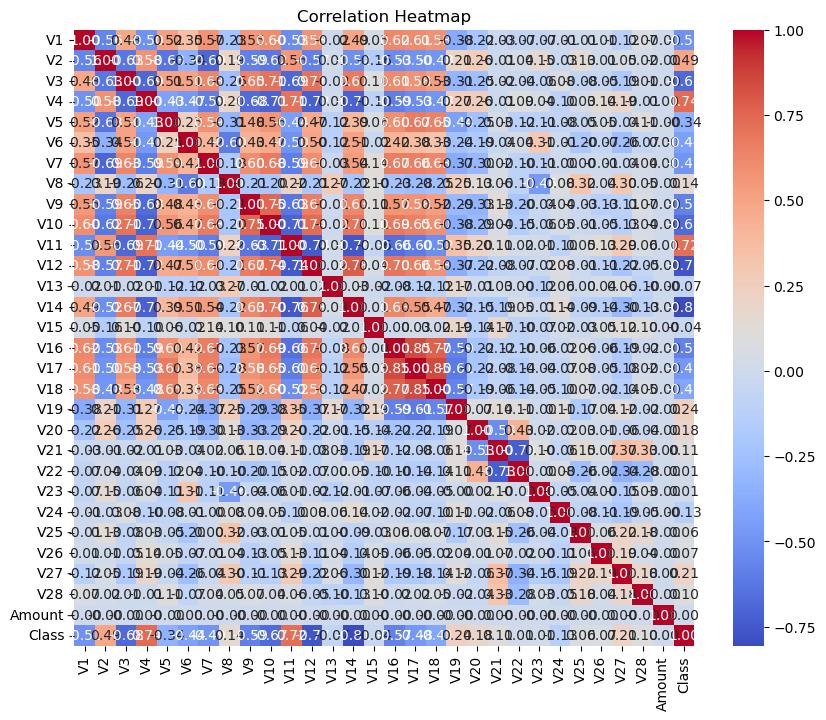

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **Histograms for each variable**

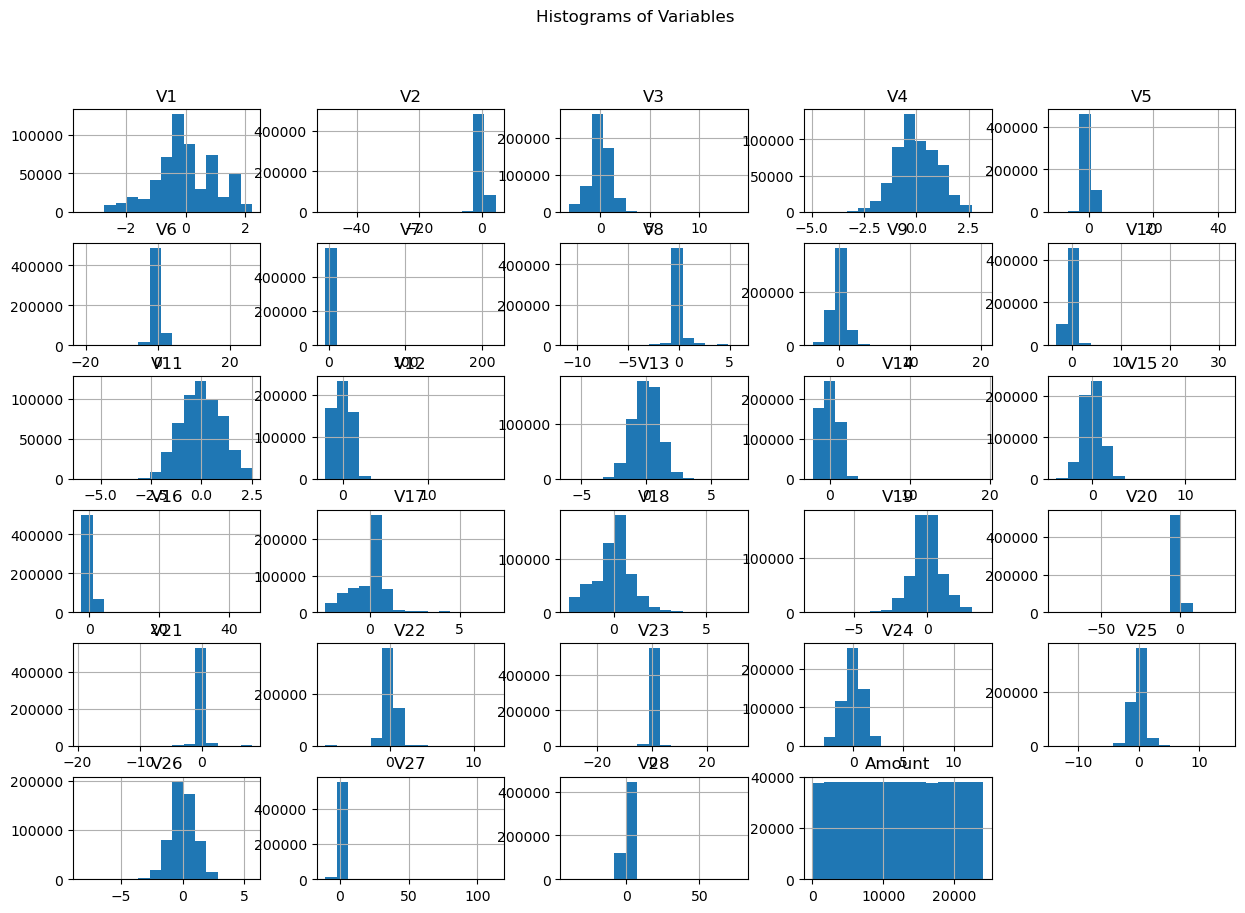

In [14]:
data.drop('Class', axis=1).hist(bins=15, figsize=(15, 10), layout=(6, 5))
plt.suptitle("Histograms of Variables")
plt.show()

## **Density Plot for Amount**

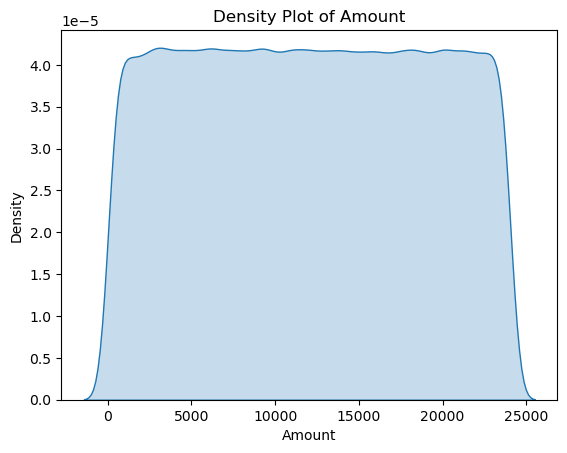

In [15]:
sns.kdeplot(data['Amount'], fill=True)
plt.title("Density Plot of Amount")
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

## **Violin Plots for few variables**

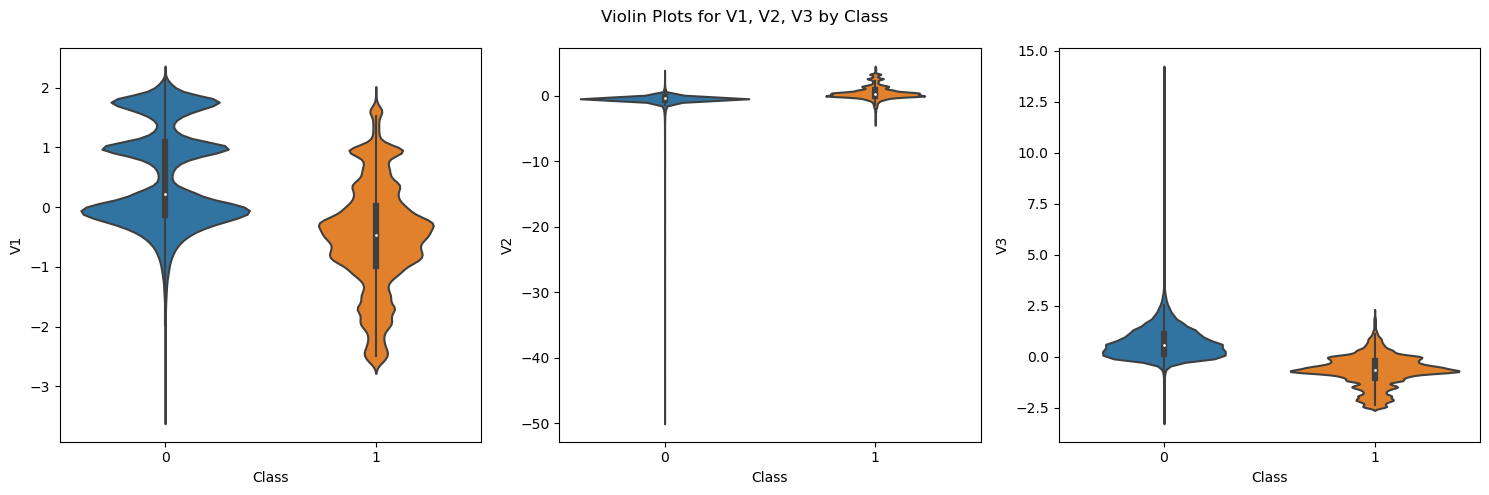

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(data=data, x='Class', y='V1', ax=axes[0])
sns.violinplot(data=data, x='Class', y='V2', ax=axes[1])
sns.violinplot(data=data, x='Class', y='V3', ax=axes[2])
plt.suptitle("Violin Plots for V1, V2, V3 by Class")
plt.tight_layout()
plt.show()

## **Plotting a FacetGrid for relationships between V1, V2 and Class**

C:\Users\josje\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


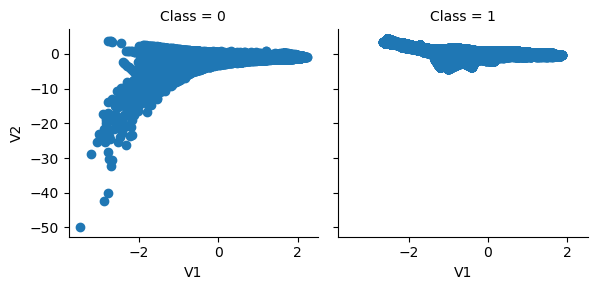

In [17]:
g = sns.FacetGrid(data, col="Class")
g.map(plt.scatter, "V1", "V2")
g.add_legend()
plt.show()

## **Stacked BarChart comparing V1, V2, V3 in different classes**


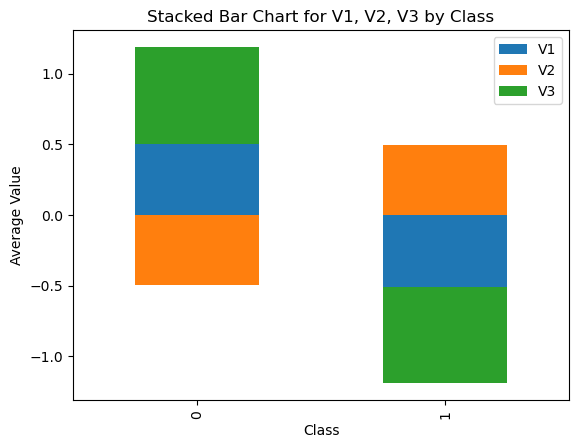

In [18]:
stacked_data = data[['V1', 'V2', 'V3', 'Class']].groupby('Class').mean()
stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for V1, V2, V3 by Class')
plt.xlabel('Class')
plt.ylabel('Average Value')
plt.show()

## **Identifying pairs of highly correlated features**

In [19]:
correlation_matrix = data.corr(numeric_only=True).values
fields = data.select_dtypes(include=[np.number]).columns
high_corr_pairs = []
for i in range(len(fields)):
    for j in range(i+1, len(fields)):
        if abs(correlation_matrix[i, j]) > 0.6:
            high_corr_pairs.append((fields[i], fields[j], correlation_matrix[i, j]))
high_corr_pairs

[('V1', 'V16', 0.6218843218813024),
 ('V1', 'V17', 0.6057987995629787),
 ('V2', 'V3', -0.6278104920364802),
 ('V2', 'V5', -0.6316692854377023),
 ('V2', 'V7', -0.6940216318715933),
 ('V2', 'V10', -0.6217979747279465),
 ('V3', 'V4', -0.6877259494882503),
 ('V3', 'V7', 0.6343364195731375),
 ('V3', 'V9', 0.6486148696014251),
 ('V3', 'V10', 0.7076758294754288),
 ('V3', 'V11', -0.6884356535465229),
 ('V3', 'V12', 0.7054965815551983),
 ('V3', 'V14', 0.673179001851226),
 ('V3', 'V16', 0.6145035236168568),
 ('V3', 'Class', -0.6820954647464735),
 ('V4', 'V9', -0.6766483622753336),
 ('V4', 'V10', -0.7128390725127082),
 ('V4', 'V11', 0.7086423094474008),
 ('V4', 'V12', -0.7225967303170644),
 ('V4', 'V14', -0.7148469911184544),
 ('V4', 'Class', 0.7359808565710189),
 ('V5', 'V17', 0.6696247633075578),
 ('V5', 'V18', 0.6450950823825514),
 ('V6', 'V8', -0.604491016704084),
 ('V7', 'V9', 0.6017887092598575),
 ('V7', 'V10', 0.6780040510354343),
 ('V7', 'V12', 0.6033180951437191),
 ('V7', 'V16', 0.667243

In [20]:
X = data.drop(['Class'], axis=1)
y = data['Class']

## **Spliting data**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Function apply PCA**

In [22]:
def apply_pca_and_get_shape(data, variance):
    pca = PCA(variance)
    pca.fit(data)
    transformed_data = pca.transform(data)
    return transformed_data.shape

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
variance_thresholds = np.arange(0.9, 1, 0.01)
shapes_after_pca = [apply_pca_and_get_shape(X_train_scaled, var) for var in variance_thresholds]

for var, shape in zip(variance_thresholds, shapes_after_pca):
    print(f"Retained variance: {var:.2f}, Shape after PCA: {shape}")

Retained variance: 0.90, Shape after PCA: (454904, 17)
Retained variance: 0.91, Shape after PCA: (454904, 18)
Retained variance: 0.92, Shape after PCA: (454904, 19)
Retained variance: 0.93, Shape after PCA: (454904, 20)
Retained variance: 0.94, Shape after PCA: (454904, 21)
Retained variance: 0.95, Shape after PCA: (454904, 22)
Retained variance: 0.96, Shape after PCA: (454904, 23)
Retained variance: 0.97, Shape after PCA: (454904, 24)
Retained variance: 0.98, Shape after PCA: (454904, 26)
Retained variance: 0.99, Shape after PCA: (454904, 27)


## **Selecting the optimal variance threshold**

In [25]:
optimal_variance = 0.95
pca_optimal = PCA(optimal_variance)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(scaler.transform(X_test))

In [26]:
print(f'Shape of training data after PCA with {optimal_variance} variance: {X_train_pca.shape}')
print(f'Shape of testing data after PCA with {optimal_variance} variance: {X_test_pca.shape}')

Shape of training data after PCA with 0.95 variance: (454904, 22)
Shape of testing data after PCA with 0.95 variance: (113726, 22)


# Supervised Learning Models

# Define Models

In [28]:
perceptron = Perceptron()
decision_tree = DecisionTreeClassifier()
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
neural_network = MLPClassifier()
svm = SVC()

# Perceptron Training and evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     57202
           1       0.98      0.91      0.95     56524

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726


Metrics:
Accuracy: 0.95
Precision: 0.98
Recall: 0.91
F1 Score: 0.95



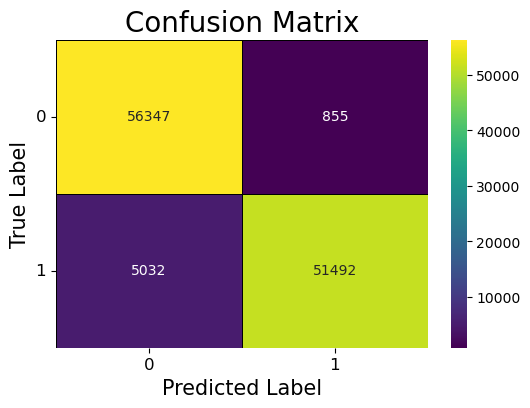

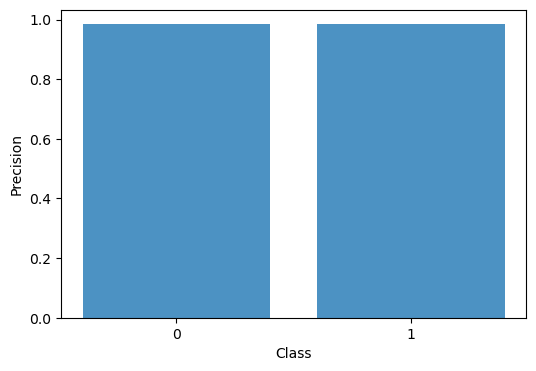

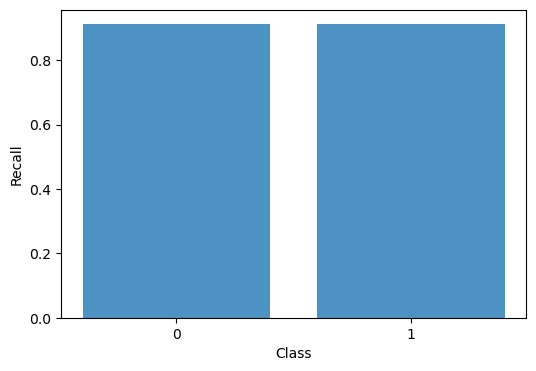

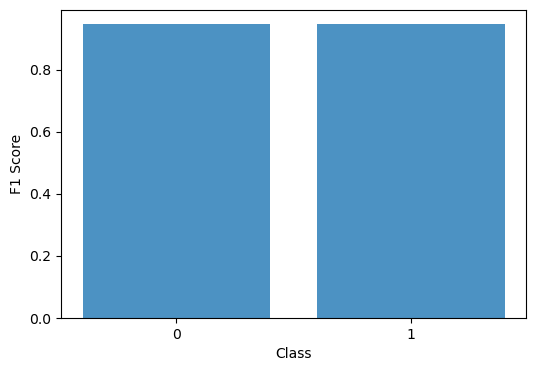

In [32]:
perceptron.fit(X_train_pca, y_train)
y_pred_classes = perceptron.predict(X_test_pca)

print(f"Classification Report:\n{classification_report(y_test, y_pred_classes)}\n")

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='black')
plt.title(f'Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.xticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.yticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.show()

for metric, name in zip([precision, recall, f1], ['Precision', 'Recall', 'F1 Score']):
      plt.figure(figsize=(6, 4))
      plt.bar(range(2), [metric, metric], align='center', alpha=0.8)
      plt.xticks(range(2))
      plt.xlabel('Class')
      plt.ylabel(name)
      plt.show()

# Decision Tree Training and Evaluation

In [ ]:
decision_tree.fit(X_train_pca, y_train)
y_pred_classes = decision_tree.predict(X_test_pca)

print(f"Classification Report:\n{classification_report(y_test, y_pred_classes)}\n")

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='black')
plt.title(f'Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.xticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.yticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.show()

for metric, name in zip([precision, recall, f1], ['Precision', 'Recall', 'F1 Score']):
      plt.figure(figsize=(6, 4))
      plt.bar(range(2), [metric, metric], align='center', alpha=0.8)
      plt.xticks(range(2))
      plt.xlabel('Class')
      plt.ylabel(name)
      plt.show()

# logistic_regression Training and Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     57202
           1       0.97      0.95      0.96     56524

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726


Metrics:
Accuracy: 0.96
Precision: 0.97
Recall: 0.95
F1 Score: 0.96



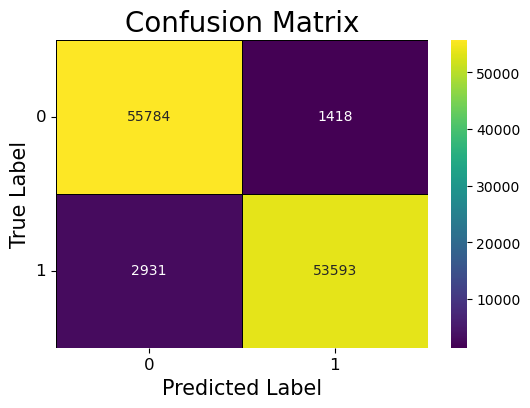

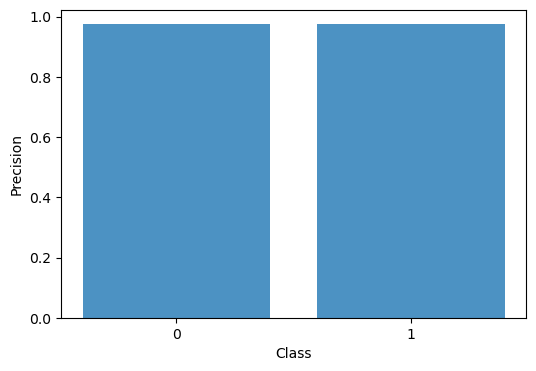

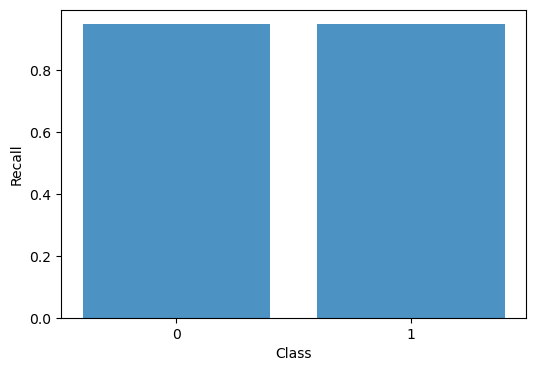

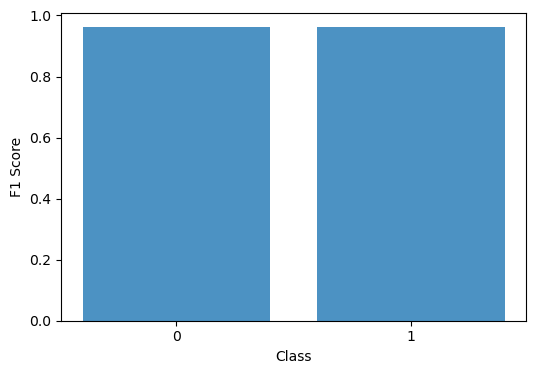

In [35]:
logistic_regression.fit(X_train_pca, y_train)
y_pred_classes = logistic_regression.predict(X_test_pca)

print(f"Classification Report:\n{classification_report(y_test, y_pred_classes)}\n")

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='black')
plt.title(f'Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.xticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.yticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.show()

for metric, name in zip([precision, recall, f1], ['Precision', 'Recall', 'F1 Score']):
      plt.figure(figsize=(6, 4))
      plt.bar(range(2), [metric, metric], align='center', alpha=0.8)
      plt.xticks(range(2))
      plt.xlabel('Class')
      plt.ylabel(name)
      plt.show()

# Randomforest Training and Evaluation

In [ ]:
random_forest.fit(X_train_pca, y_train)
y_pred_classes = random_forest.predict(X_test_pca)

print(f"Classification Report:\n{classification_report(y_test, y_pred_classes)}\n")

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='black')
plt.title(f'Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.xticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.yticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.show()

for metric, name in zip([precision, recall, f1], ['Precision', 'Recall', 'F1 Score']):
      plt.figure(figsize=(6, 4))
      plt.bar(range(2), [metric, metric], align='center', alpha=0.8)
      plt.xticks(range(2))
      plt.xlabel('Class')
      plt.ylabel(name)
      plt.show()

# KNN Training and Evaluation

In [ ]:
knn.fit(X_train_pca, y_train)
y_pred_classes = knn.predict(X_test_pca)

print(f"Classification Report:\n{classification_report(y_test, y_pred_classes)}\n")

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='black')
plt.title(f'Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.xticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.yticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.show()

for metric, name in zip([precision, recall, f1], ['Precision', 'Recall', 'F1 Score']):
      plt.figure(figsize=(6, 4))
      plt.bar(range(2), [metric, metric], align='center', alpha=0.8)
      plt.xticks(range(2))
      plt.xlabel('Class')
      plt.ylabel(name)
      plt.show()

# Naive Bayes Training and Evaluation

In [ ]:
naive_bayes.fit(X_train_pca, y_train)
y_pred_classes = naive_bayes.predict(X_test_pca)

print(f"Classification Report:\n{classification_report(y_test, y_pred_classes)}\n")

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='black')
plt.title(f'Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.xticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.yticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.show()

for metric, name in zip([precision, recall, f1], ['Precision', 'Recall', 'F1 Score']):
      plt.figure(figsize=(6, 4))
      plt.bar(range(2), [metric, metric], align='center', alpha=0.8)
      plt.xticks(range(2))
      plt.xlabel('Class')
      plt.ylabel(name)
      plt.show()

# **MLP Training and Evaluation**

In [ ]:
neural_network.fit(X_train_pca, y_train)
y_pred_classes = neural_network.predict(X_test_pca)

print(f"Classification Report:\n{classification_report(y_test, y_pred_classes)}\n")

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='black')
plt.title(f'Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.xticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.yticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.show()

for metric, name in zip([precision, recall, f1], ['Precision', 'Recall', 'F1 Score']):
      plt.figure(figsize=(6, 4))
      plt.bar(range(2), [metric, metric], align='center', alpha=0.8)
      plt.xticks(range(2))
      plt.xlabel('Class')
      plt.ylabel(name)
      plt.show()

# **SVM Training and Evaluation**

In [ ]:
svm.fit(X_train_pca, y_train)
y_pred_classes = svm.predict(X_test_pca)

print(f"Classification Report:\n{classification_report(y_test, y_pred_classes)}\n")

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}\n')

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='black')
plt.title(f'Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.xticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.yticks(ticks=np.arange(0.5, len(np.unique(y_test))), labels=np.unique(y_test), rotation=0, fontsize=12)
plt.show()

for metric, name in zip([precision, recall, f1], ['Precision', 'Recall', 'F1 Score']):
      plt.figure(figsize=(6, 4))
      plt.bar(range(2), [metric, metric], align='center', alpha=0.8)
      plt.xticks(range(2))
      plt.xlabel('Class')
      plt.ylabel(name)
      plt.show()

# **Unsupervised Learning Models**

# **Elbow Method**

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **KMean**

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_pca)

clusters = kmeans.predict(X_test_pca)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering after PCA')
plt.xlabel('cluster 1')
plt.ylabel('cluster 2')
plt.show()

# **GMM**

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train_pca)

clusters = gmm.predict(X_test_pca)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# **Deep Learning**

# **ANN Model**

In [ ]:
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dense(16, activation='relu',
    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
    ])

In [ ]:
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# **Training**

In [ ]:
ann_history = ann_model.fit(
X_train_scaled, y_train,
epochs=10,
batch_size=2046,
validation_data=(X_test_scaled, y_test))

# **Accuracy**

In [ ]:
test_loss, test_accuracy = ann_model.evaluate(X_test_scaled, y_test)
test_accuracy ,test_loss

# **Prediction Ann**

In [ ]:
y_pred_prob = ann_model.predict(X_test_scaled)
y_pred_class = (y_pred_prob > 0.5).astype('int32')

# **Evaluation of ANN**

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')